# Visualisation of LIDC data
Overview of `pylidc` library functionalities.

## Importing useful libraries

In [1]:
import pylidc as pl
import numpy as np
import matplotlib.pyplot as plt
plt.set_cmap('gray')
#%matplotlib widget  # to make matplotlib widgets interactive

<Figure size 432x288 with 0 Axes>

## Defining path to patients files

Pylidc package needs a configurational file at path ```/home/dzban112/.pylidcrc``` in which I should put a path to the LIDC-IDRI data folder.

In [2]:
# /home/dzban112/.pylidcrc -> path to a configurational file
# ./LIDC_sets/manifest_10_patients/LIDC-IDRI

path = './LIDC_sets/manifest_10_patients/LIDC-IDRI'
f = open('/home/dzban112/.pylidcrc', 'w') # mode 'w' clear file and starts writing from the begining. To append text use mode 'a'.
f.write(f'[dicom]\npath = {path}\n\n')
f.close()

Let's see configurational file:

In [3]:
! cat /home/dzban112/.pylidcrc

[dicom]
path = ./LIDC_sets/manifest_10_patients/LIDC-IDRI



## Fast look on data structure

There is data of **10** patients in directories like `LIDC-IDRI-00xx`, where xx is from `01` to `10`.

In [4]:
! ls ./LIDC_sets/manifest_10_patients/LIDC-IDRI

LIDC-IDRI-0001	LIDC-IDRI-0003	LIDC-IDRI-0005	LIDC-IDRI-0007	LIDC-IDRI-0009
LIDC-IDRI-0002	LIDC-IDRI-0004	LIDC-IDRI-0006	LIDC-IDRI-0008	LIDC-IDRI-0010


## Accessing Scans
Library has information about all scans in LIDC-IDRI dataset, but hasn't DICOM files. DICOM file is an abbreviation from Digital Imaging and Communcation in Medicine. In simplest words it is a format of medical images with metadata. DICOM has not only information about image but also metadata. It is possible to see informations about all scans in database, but I can only visualize that scans, which I have previously downloaded.

In [5]:
# Query for all CT scans in LIDC-IDRI dataset.
scans = pl.query(pl.Scan)
print(f"There is {scans.count()} scans in the whole dataset.")

There is 1018 scans in the whole dataset.


In [6]:
# filtering CT scans. 
scans = pl.query(pl.Scan).filter(pl.Scan.slice_thickness <=1)
print(f"There is {scans.count()} scans with slice_thickness attribute <= 1 unit.")
scans = pl.query(pl.Scan).filter(pl.Scan.slice_thickness <=1, pl.Scan.pixel_spacing <= 0.6)
print(f"There is {scans.count()} scans with slice_thickness attribute <= 1 unit and pixel_spacing <= 0.6.")

There is 97 scans with slice_thickness attribute <= 1 unit.
There is 31 scans with slice_thickness attribute <= 1 unit and pixel_spacing <= 0.6.


In [7]:
# Extraction of informations about patient from filtered scans.
scans = pl.query(pl.Scan).filter(pl.Scan.slice_thickness <=1)
# Let's choose first one from filtered scans:
scan = scans.first()
print(f"patient ID: {scan.patient_id}")
print(f"pixel spacing: {scan.pixel_spacing}")
print(f"slice thickness: {scan.slice_spacing}")

patient ID: LIDC-IDRI-0066
pixel spacing: 0.63671875
slice thickness: 0.5


In [8]:
# Selecting a specified patient from database by patient_id attribute.
pid = 'LIDC-IDRI-0002' # patient id
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()

In [9]:
# By this you got full scan for one patient. One scan consists of a lot of slices.
scan

Scan(id=13,patient_id=LIDC-IDRI-0002)

In [10]:
# Transforming scan into 3D numpy array by .to_volume() method.
vol = scan.to_volume()
print(f"3D numpy array has dimmensions: {vol.shape}; (dim, dim, depth)")

Loading dicom files ... This may take a moment.
3D numpy array has dimmensions: (512, 512, 261); (dim, dim, depth)


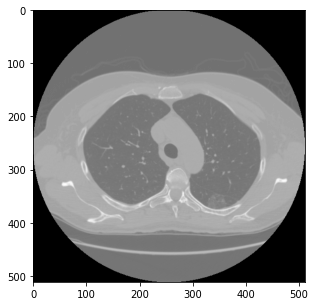

In [11]:
# Slices visualization
slice_number=185 # which slice should be visualized

plt.figure(figsize=(5, 5))
plt.imshow(vol[:,:,slice_number])
plt.show()

Loading dicom files ... This may take a moment.


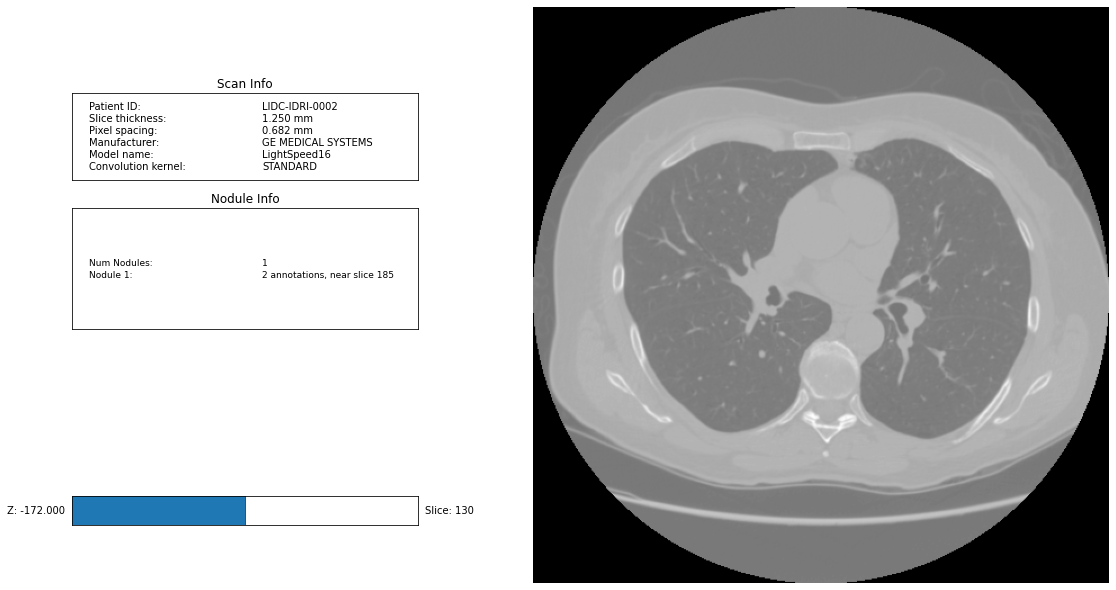

In [12]:
# There is also built-in method for the visualization.
# Plot is interactive when call magic function %matplotlib widget is called
# Widget shows information about scan (patient ID, slice thickness, ... and also information about nodules)
# .cluster_annotations() method estimate if annotations refers to one nodule or to many.
scan.visualize(annotation_groups=scan.cluster_annotations())

### Loading all scan images into a list
Loading all scan images into one list of slices.

In [147]:
images = scan.load_all_dicom_images()

Loading dicom files ... This may take a moment.


In [148]:
print(f"There is {len(images)} slices of the scan.")

There is 261 slices of the scan.


### Extracting the pixel array from scan slices!
Each slice in a list is represented as dataset with a lot of data. Behind metadata there is also a **pixel array** representing image!

In [149]:
print(f"Type of each slice: {type(images[0])}.")

pixel_array=images[0].pixel_array

print(f"Type of a pixel array for a slice: {type(pixel_array)}")
print(f"Shape of a pixel array for a slice: {pixel_array.shape}")

Type of each slice: <class 'pydicom.dataset.FileDataset'>.
Type of a pixel array for a slice: <class 'numpy.ndarray'>
Shape of a pixel array for a slice: (512, 512)


## Accessing Annotations
`pylidc.Annotation` object belongs to a `pylidc.Scan` object. Annotation refers to one *pathological area* in a scan and are described by the characteristic values assigned by the particular annotating radiologist.

### Querying for annotations

In [151]:
# Simmilarly to scans, we can query all annotations.
anns = pl.query(pl.Annotation)
print(f"There are {anns.count()} annotations in the dataset.")

There are 6859 annotations in the dataset.


In [152]:
# Also we are able to filter annotations:
anns = pl.query(pl.Annotation).filter(pl.Annotation.spiculation == 5,
                                      pl.Annotation.malignancy == 5)
print(f"There are {anns.count()} annotations meeting specified requirements.")

There are 91 annotations meeting specified requirements.


In [153]:
# We can select first annotation from a query
ann = anns.first()

# and then find out particular descripting values for annotated nodule:
print(f"Lobulation: {ann.lobulation}")
print(f"Subtlety: {ann.subtlety}")
print(f"Internal Structure: {ann.internalStructure}")
print(f"Calcification: {ann.calcification}")

Lobulation: 5
Subtlety: 3
Internal Structure: 1
Calcification: 6


All available features may be find out by `pl.annotation_feature_names` attribute.

In [154]:
pl.annotation_feature_names

('subtlety',
 'internalStructure',
 'calcification',
 'sphericity',
 'margin',
 'lobulation',
 'spiculation',
 'texture',
 'malignancy')

There is a gentle method `.print_formatted_feature_table()` to easily visualize all values.

In [48]:
# All descripting a nodule values
ann.print_formatted_feature_table()

Feature              Meaning                    # 
-                    -                          - 
Subtlety           | Fairly Subtle            | 3 
Internalstructure  | Soft Tissue              | 1 
Calcification      | Absent                   | 6 
Sphericity         | Round                    | 5 
Margin             | Sharp                    | 5 
Lobulation         | Marked Lobulation        | 5 
Spiculation        | Marked Spiculation       | 5 
Texture            | Solid                    | 5 
Malignancy         | Highly Suspicious        | 5 


### Querying directly to interesting attributes
There is also option to query directly for interesting us values rather than all annotations.

In [49]:
# For example, all spiculation values higher than specified number.
spic_vals = pl.query(pl.Annotation.spiculation).filter(pl.Annotation.spiculation > 3)

In [50]:
print(f"First filtered spiculation value: {spic_vals[0]} which meet criterium > 3.")

First filtered spiculation value: (4,) which meet criterium > 3.


### Contour-derived data
The `pylidc.Contour` class is almost never used directly, but only through the `pylidc.Annotation` object to which the contours belong.

In [58]:
ann = pl.query(pl.Annotation).first() # Choosing first annotation from a query
contours = ann.contours # extracting contour from the ann object.
print(ann.scan)
print(contours[0])
# => Contour(id=21,annotation_id=1)

Scan(id=1,patient_id=LIDC-IDRI-0078)
Contour(id=1,annotation_id=1)


In [59]:
ann

Annotation(id=1,scan_id=1)

In [79]:
annos = pl.query(pl.Annotation).all()
print(f"There is {len(annos)} annotations")
print("Importantly! First annotation in a list doesn't refers to the first patient.")
print(f"First annotation in a list refers to the patient with ID: {annos[0].scan}")

There is 6859 annotations
Importantly! First annotation in a list doesn't refers to the first patient.
First annotation in a list refers to the patient with ID: Scan(id=1,patient_id=LIDC-IDRI-0078)


Returned `contours` is a list-like object which includes few contours made by few specialists. All contours in the list refers to the one annotation!

In [52]:
contours

[Contour(id=1,annotation_id=1),
 Contour(id=2,annotation_id=1),
 Contour(id=3,annotation_id=1),
 Contour(id=4,annotation_id=1),
 Contour(id=5,annotation_id=1),
 Contour(id=6,annotation_id=1)]

It is also possible to extract from an annotation values of nodule diameter, surface_area and volume.

### Extracting annotations for the given patient id
Like in SQL it requires `.join` operation. Below I extracted first annotation for a `LIDC-IDRI-0008` patient.

In [80]:
ann = pl.query(pl.Annotation).join(pl.Scan).filter(pl.Scan.patient_id == "LIDC-IDRI-0008").first()
ann.scan

Scan(id=19,patient_id=LIDC-IDRI-0008)

For each nodule it is possible to generate boolean mask indicating whether pixel is a part of a nodule or not.

In [84]:
mask = ann.boolean_mask()
print(mask.shape, mask.dtype)

(9, 11, 2) bool


What is important. Mask is only local. It is not concerning all the scan volume. Rather, it extends slightly contour.

In [87]:
bbox = ann.bbox()
print(bbox)

(slice(286, 295, None), slice(118, 129, None), slice(70, 72, None))


### Visualizing annotations
There are in-built functions to visualize nodules in 3D and also on CT scans.

In [110]:
%matplotlib widget

In [115]:
ann = pl.query(pl.Annotation).join(pl.Scan).filter(pl.Scan.patient_id == "LIDC-IDRI-0008").first()

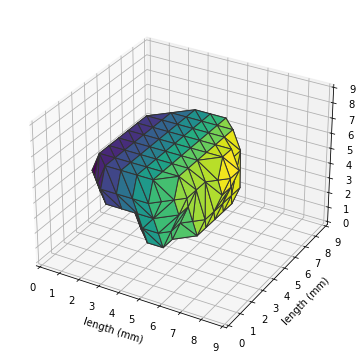

In [116]:
# 3D visualization of the nodule
ann.visualize_in_3d()

Loading dicom files ... This may take a moment.


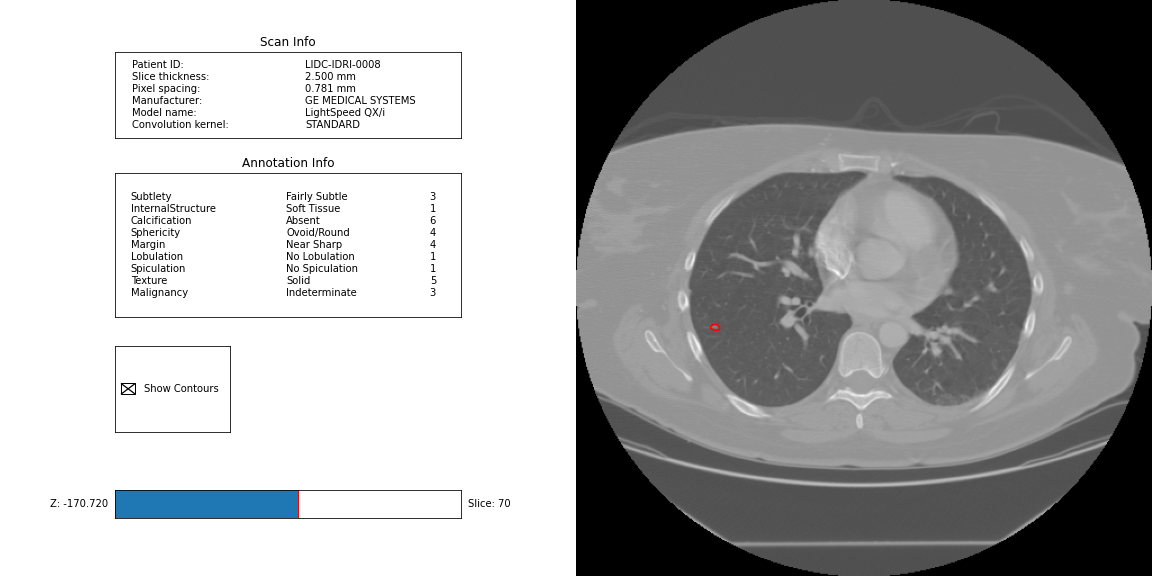

In [117]:
# 2D visualization of the nodule
ann.visualize_in_scan()

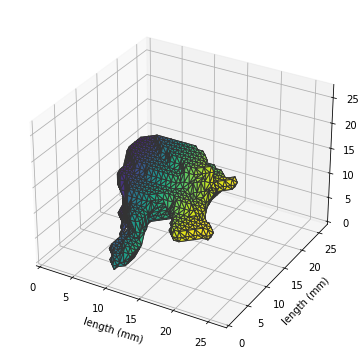

In [119]:
# 3D visualization of the another nodule
ann = pl.query(pl.Annotation)\
        .filter(pl.Annotation.lobulation == 5).first()
ann.visualize_in_3d()

### Accessing Annotations by Annotator

In [121]:
from pylidc.utils import consensus
from skimage.measure import find_contours

Loading dicom files ... This may take a moment.


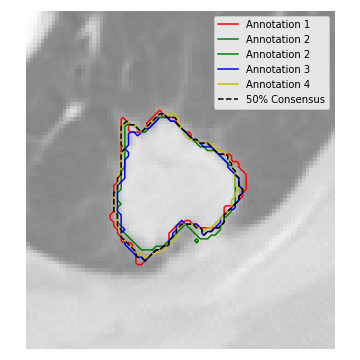

In [122]:
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == 'LIDC-IDRI-0001').first()
vol = scan.to_volume()

nods = scan.cluster_annotations()
anns = nods[0]

cmask,cbbox,masks = consensus(anns, clevel=0.5,
                              pad=[(20,20), (20,20), (0,0)])
k = int(0.5*(cbbox[2].stop - cbbox[2].start))

# Set up the plot.
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.imshow(vol[cbbox][:,:,k], cmap=plt.cm.gray, alpha=0.5)

# Plot the annotation contours for the kth slice.
colors = ['r', 'g', 'b', 'y']
for j in range(len(masks)):
    for c in find_contours(masks[j][:,:,k].astype(float), 0.5):
        label = "Annotation %d" % (j+1)
        plt.plot(c[:,1], c[:,0], colors[j], label=label)

# Plot the 50% consensus contour for the kth slice.
for c in find_contours(cmask[:,:,k].astype(float), 0.5):
    plt.plot(c[:,1], c[:,0], '--k', label='50% Consensus')

ax.axis('off')
ax.legend()
plt.tight_layout()
plt.show()

***Terminat hora diem, terminat auctor opus***